In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
data=pd.read_csv("titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


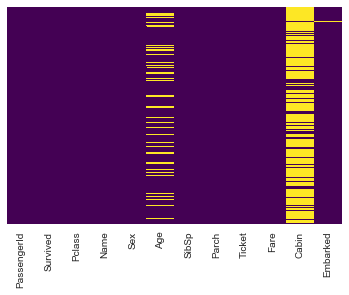

In [114]:
#Lets check the null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

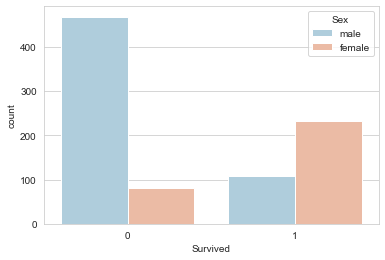

In [115]:
#Lets check how any males and females survied, where 1 is survived and 0 is not.
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

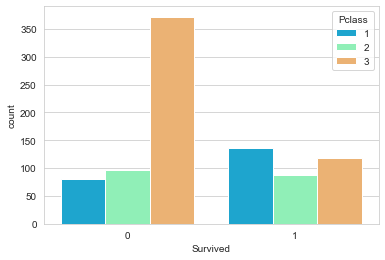

In [116]:
#From the above graph we can see that no of females passenger survived was more with respect to males, so Lets check passengerclass with respect to survived.
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

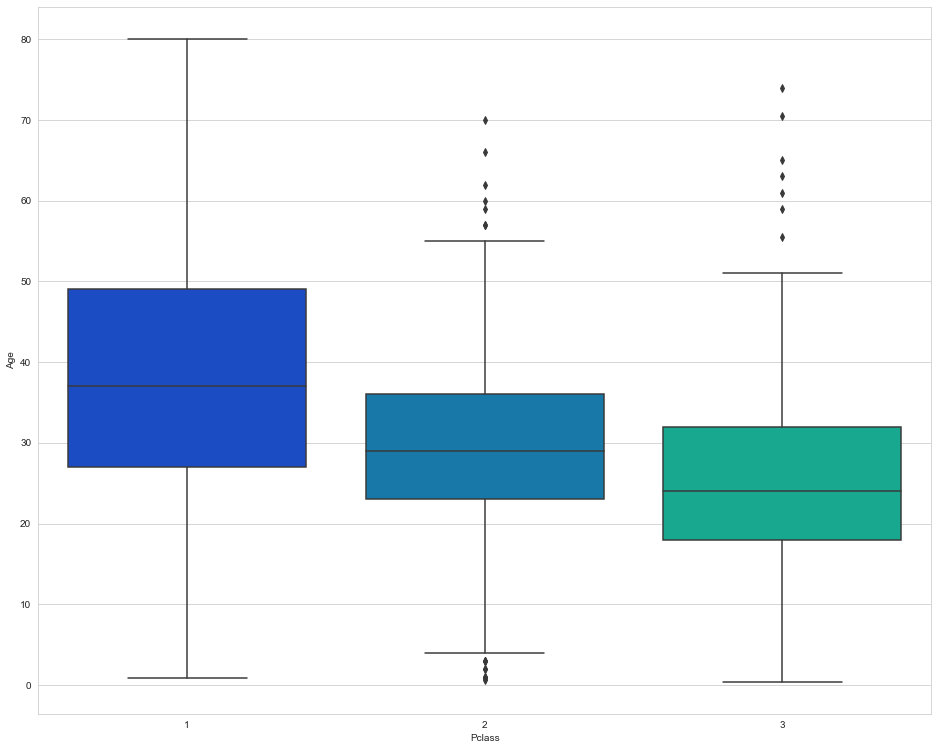

In [117]:
#we can see from the above heatmap that Age and Cabin has significant amount of null values, so lets check the relaionship between age with passenger class.
plt.figure(figsize=(16, 13))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [118]:
#From the above boxplot we can see that the avrage age of class 1 passanger is 37, class 2 passenger is 28, class 3 passenger is 23.
#So Lets replace the NAN values with average age values.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [119]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

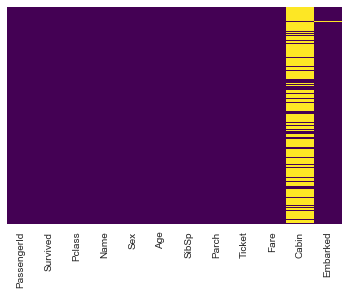

In [120]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [121]:
#So as we can see from the above function we have successfull removed the NAN values from age columns, now we need to treat the cabin column as they have multiple NAN Values.
#Lets drop the cabin columns as it have any NAN Values
data.drop('Cabin',axis=1,inplace=True)

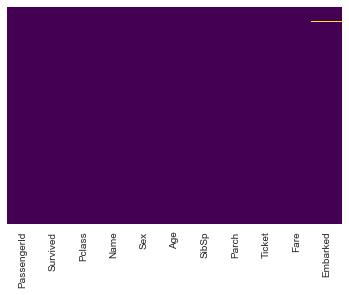

In [122]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [124]:
#From the above information we can see that their are 4 object variables, out of which sex needs to be level encoded, and rest two are not required.
data.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [125]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Sex']=LE.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,24.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [126]:
x=data.iloc[:,2:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [127]:
y=data.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [224]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [225]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(712, 6) (179, 6)
(712,) (179,)


In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score

In [232]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [233]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8044692737430168


classification_report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       117
           1       0.71      0.74      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.80      0.81       179



[[98 19]
 [16 46]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, v

F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)





*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.8212290502793296


classification_report
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.76      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



[[103  14]
 [ 18  44]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_de

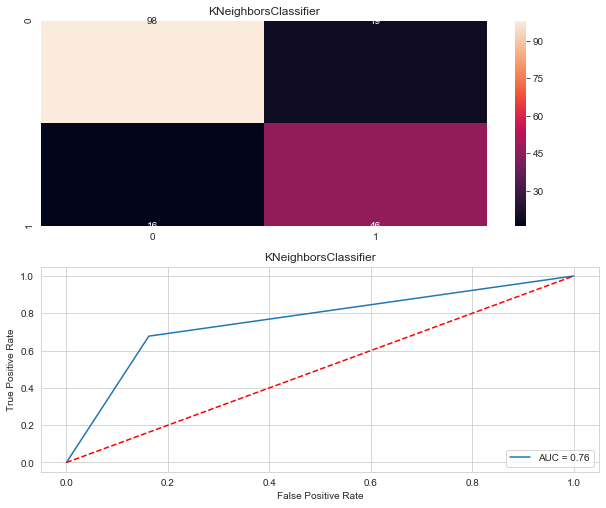

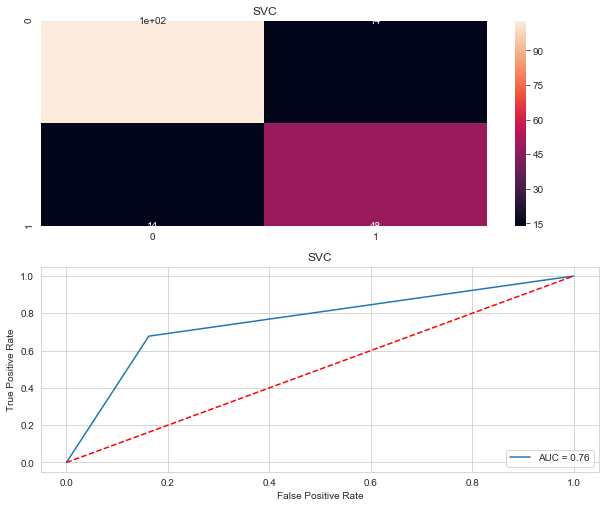

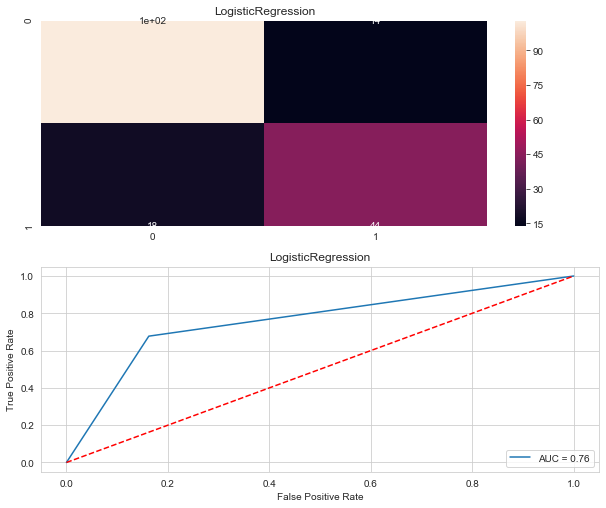

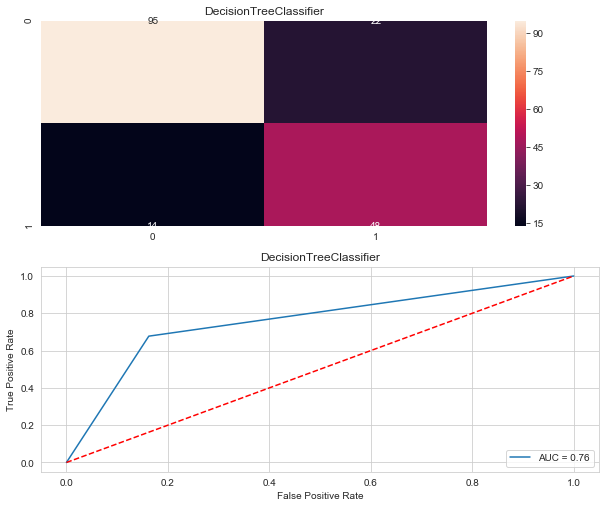

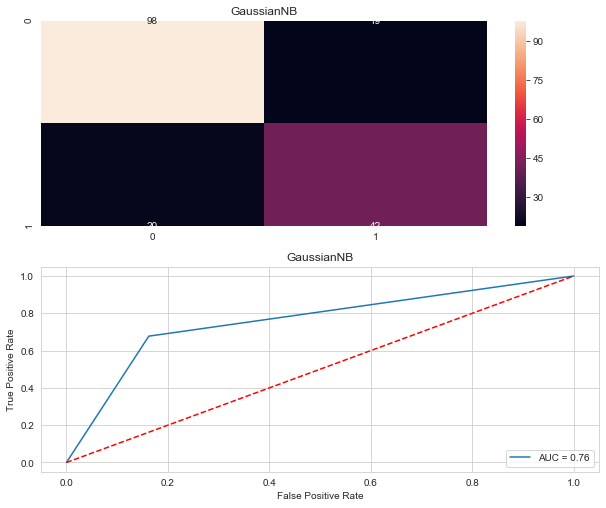

In [239]:
Model = []
score = []
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [235]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'F1_Socre':})
result

,Model,Accuracy_score
0,KNeighborsClassifier,80.446927
1,SVC,84.357542
2,LogisticRegression,82.122905
3,DecisionTreeClassifier,79.888268
4,GaussianNB,78.212291


In [ ]:
# I chose SVC Model as the accuracy score of SVC is better than the rest

In [240]:
from sklearn.externals import joblib

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [241]:
joblib.dump(SVC,"titanic_train.csv")

['titanic_train.csv']